In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib.cm import rainbow
import warnings
%matplotlib inline
%matplotlib notebook 
import matplotlib
matplotlib.use('Agg')  # Use 'Agg' for scripts, or 'TkAgg' for GUI applications
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [5]:
data = pd.read_csv("Breast_Cancer.csv")
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [3]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4019    False
4020    False
4021    False
4022    False
4023    False
Length: 4024, dtype: bool

In [6]:
data.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [7]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [8]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [9]:
data.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [10]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [12]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt
def bar_chart(feature):
    survived = data[data['Status']=='Alive'][feature].value_counts()
    dead = data[data['Status']=='Dead'][feature].value_counts()
    
    df = pd.DataFrame([survived,dead])
    # custom index
    df.index = ['Alive','Dead']
    
    df.plot(kind='bar',stacked=True, figsize=(10,6))
    plt.xticks(rotation=0)
   

In [14]:
bar_chart("Estrogen Status")

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [ ]:
# bar_chart("Progesterone Status")
bar_chart("Progesterone Status")

In [ ]:
bar_chart("differentiate")

In [ ]:
bar_chart("Grade")

In [ ]:
bar_chart("Marital Status")

In [20]:
# Clean the 'T Stage' column name and drop the old column if it exists
if 'T Stage ' in data.columns:
    data['T Stage'] = data['T Stage ']
    data.drop(columns='T Stage ', inplace=True)

# Call the function with the desired feature
bar_chart('T Stage')


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

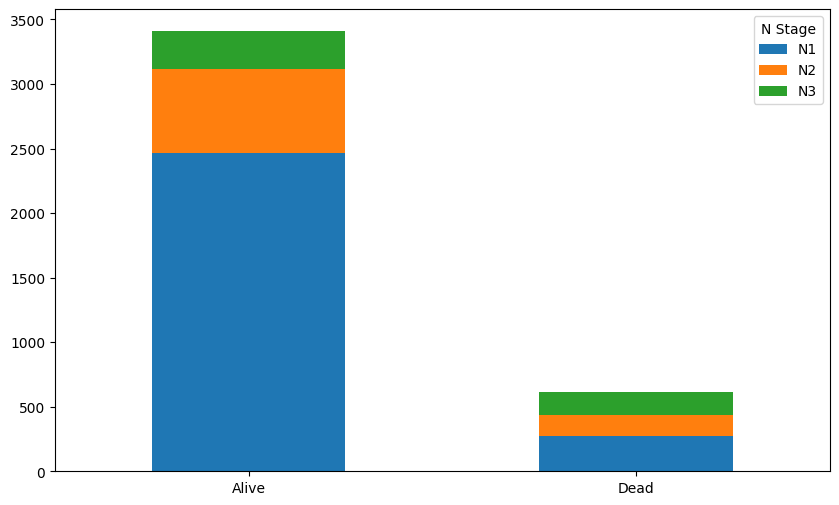

In [19]:
bar_chart("N Stage")

Text(0.5, 1.0, 'Bar Chart of Patients by Status ')

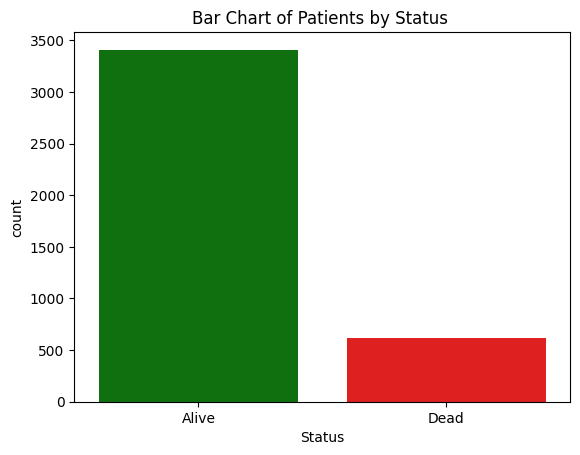

In [20]:
sns.countplot(x ="Status", data = data, palette =(["g", "r"]))
plt.title("Bar Chart of Patients by Status ")

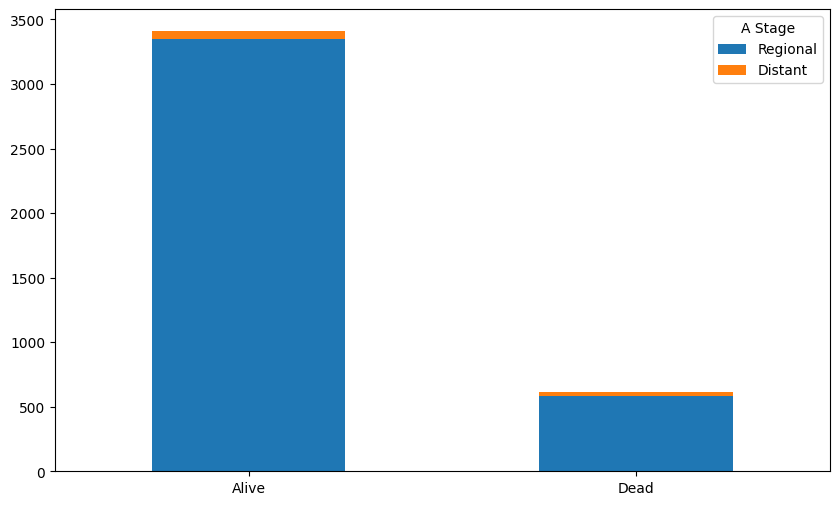

In [21]:
bar_chart("A Stage")

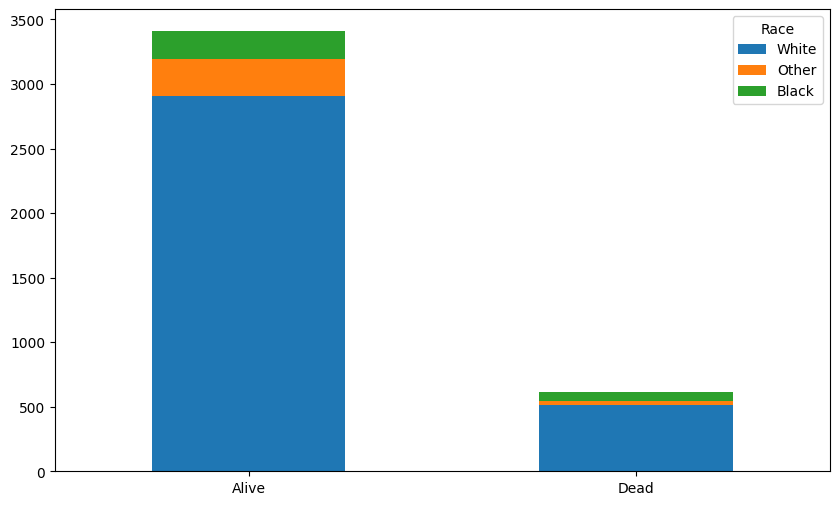

In [23]:
bar_chart("Race")

In [24]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'T Stage'],
      dtype='object')

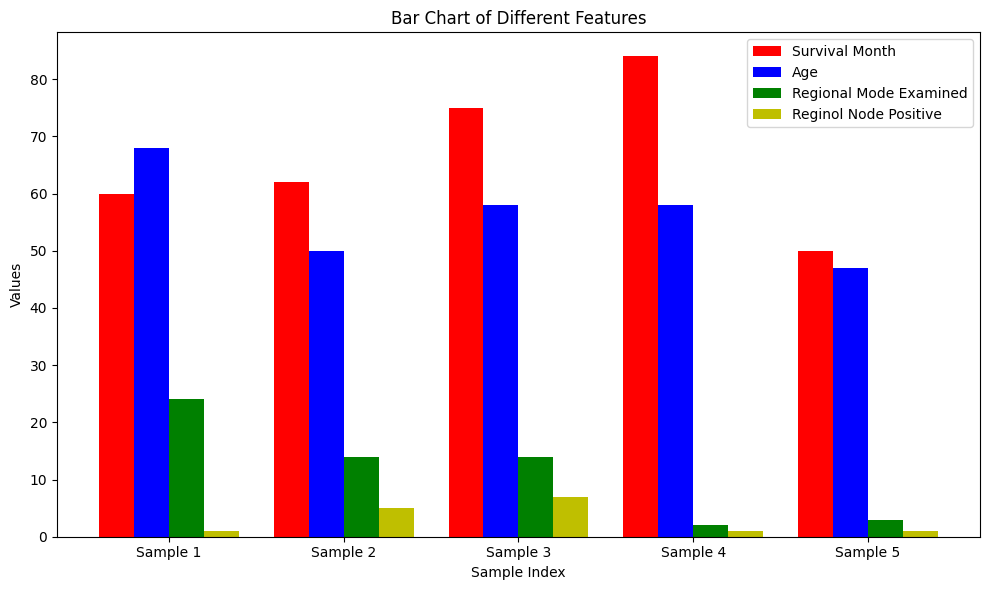

In [26]:
# Select the first 5 entries of each specified feature
g1 = data["Survival Months"].head()
g2 = data["Age"].head()
g3 = data["Regional Node Examined"].head()
g4 = data["Reginol Node Positive"].head()

# Create an index for the x-axis
index = np.arange(5)
width = 0.2  # Adjust width for better spacing between bars

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each feature as a separate bar set
plt.bar(index, g1, width, color="r", label="Survival Month")
plt.bar(index + width, g2, width, color="b", label="Age")
plt.bar(index + 2 * width, g3, width, color="g", label="Regional Mode Examined")
plt.bar(index + 3 * width, g4, width, color="y", label="Reginol Node Positive")

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Bar Chart of Different Features')
plt.xticks(index + 1.5 * width, ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'])
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


In [27]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'T Stage'],
      dtype='object')

In [28]:
df = pd.DataFrame(data)

In [1]:
facet = sns.FacetGrid(df, hue = "Status", aspect = 5)
facet.map(sns.kdeplot, "Age", fill = True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()
plt.show()

NameError: name 'sns' is not defined

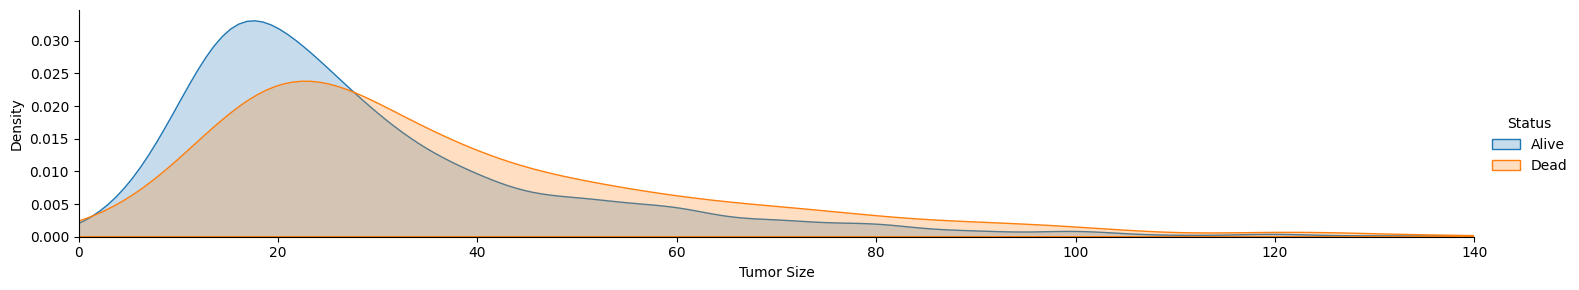

In [30]:
facet = sns.FacetGrid(df, hue ="Status", aspect = 5)
facet.map(sns.kdeplot, "Tumor Size", shade = True)
facet.set(xlim=(0, df["Tumor Size"].max()))
facet.add_legend()
plt.show()

In [31]:
df["Grade"] = df["Grade"].replace(["1","2","3",' anaplastic; Grade IV'], [1,2,3,4])

[]

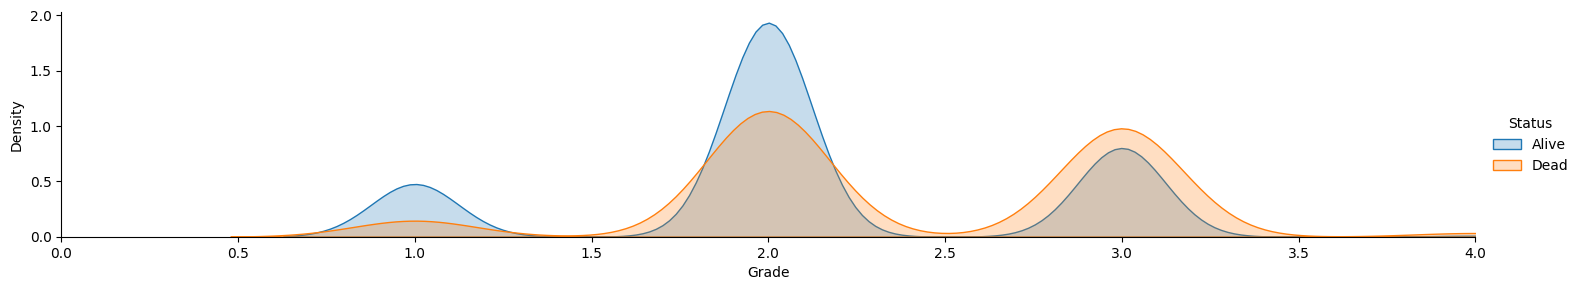

In [32]:
facet = sns.FacetGrid(df, hue = "Status", aspect = 5)
facet.map(sns.kdeplot, "Grade", shade = True )
facet.set(xlim=(0, df["Grade"].max()))
facet.add_legend()
plt.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

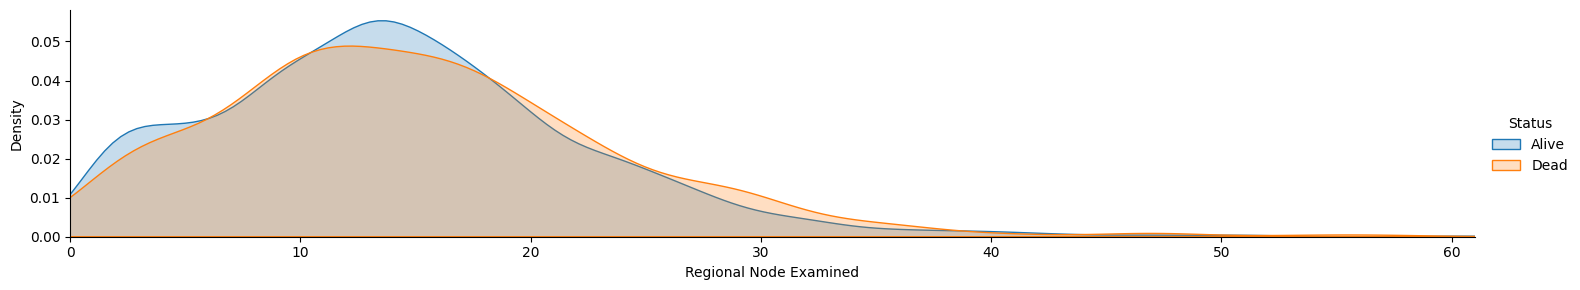

In [33]:
facet = sns.FacetGrid(df, hue = "Status", aspect = 5)
facet.map(sns.kdeplot, "Regional Node Examined", shade =True)
facet.set(xlim=(0, df["Regional Node Examined"].max()))
facet.add_legend()
plt.show

[]

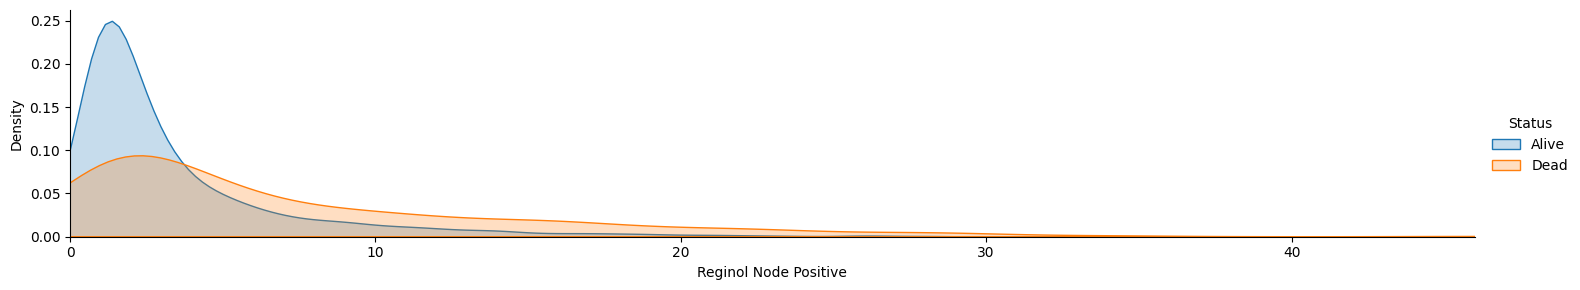

In [34]:
facet = sns.FacetGrid(df, hue="Status", aspect = 5)
facet.map(sns.kdeplot, "Reginol Node Positive", shade = True)
facet.set(xlim=(0, df["Reginol Node Positive"].max()))
facet.add_legend()
plt.plot()

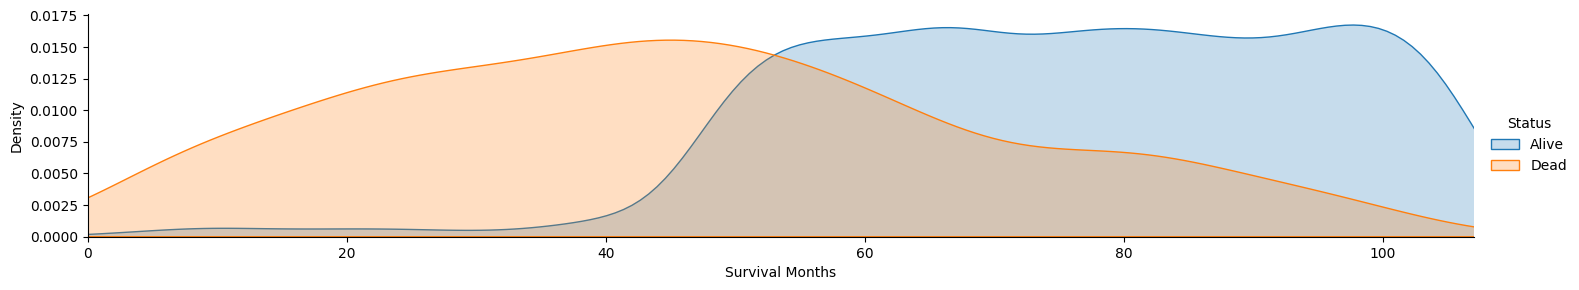

In [35]:
facet = sns.FacetGrid(df, hue = "Status", aspect = 5)
facet.map(sns.kdeplot, "Survival Months" ,shade = True)
facet.set(xlim=(0, df["Survival Months"]. max()))
facet.add_legend()
plt.show()

In [37]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'T Stage'],
      dtype='object')

In [42]:
df["differentiate"].value_counts()

differentiate
Moderately          2351
Poorly              1111
Well                 543
Undifferentiated      19
Name: count, dtype: int64

In [43]:
df['differentiate'] = df['differentiate'].replace(['Poorly differentiated','Moderately differentiated', 
                                                 'Well differentiated',], ['Poorly', 'Moderately', 'Well'])


In [44]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,Positive,Positive,3,1,50,Alive,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,N1,IIA,Moderately,2,Regional,9,Positive,Positive,1,1,49,Alive,T1
4020,56,White,Divorced,N2,IIIA,Moderately,2,Regional,46,Positive,Positive,14,8,69,Alive,T2
4021,68,White,Married,N1,IIB,Moderately,2,Regional,22,Positive,Negative,11,3,69,Alive,T2
4022,58,Black,Divorced,N1,IIB,Moderately,2,Regional,44,Positive,Positive,11,1,72,Alive,T2


In [45]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,Positive,Positive,3,1,50,Alive,T2


In [46]:
df["Race"].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [47]:
df["Race"].value_counts()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

In [48]:
df["Race"] = df["Race"].replace(["White", "Black", "Other"], [0,1,2])

In [49]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,N1,IIA,Poorly,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,0,Married,N2,IIIA,Moderately,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,0,Divorced,N3,IIIC,Moderately,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,0,Married,N1,IIA,Poorly,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,0,Married,N1,IIB,Poorly,3,Regional,41,Positive,Positive,3,1,50,Alive,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,N1,IIA,Moderately,2,Regional,9,Positive,Positive,1,1,49,Alive,T1
4020,56,0,Divorced,N2,IIIA,Moderately,2,Regional,46,Positive,Positive,14,8,69,Alive,T2
4021,68,0,Married,N1,IIB,Moderately,2,Regional,22,Positive,Negative,11,3,69,Alive,T2
4022,58,1,Divorced,N1,IIB,Moderately,2,Regional,44,Positive,Positive,11,1,72,Alive,T2


In [50]:
df["differentiate"].unique()

array(['Poorly', 'Moderately', 'Well', 'Undifferentiated'], dtype=object)

In [51]:
df["differentiate"].value_counts()

differentiate
Moderately          2351
Poorly              1111
Well                 543
Undifferentiated      19
Name: count, dtype: int64

In [52]:
df["differentiate"] = df["differentiate"].replace(["Poorly", "Moderately", 'Well', "Undifferentiated"],  [0, 1, 2, 3])

In [53]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,N1,IIA,0,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,0,Married,N2,IIIA,1,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,0,Divorced,N3,IIIC,1,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,0,Married,N1,IIA,0,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,0,Married,N1,IIB,0,3,Regional,41,Positive,Positive,3,1,50,Alive,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,N1,IIA,1,2,Regional,9,Positive,Positive,1,1,49,Alive,T1
4020,56,0,Divorced,N2,IIIA,1,2,Regional,46,Positive,Positive,14,8,69,Alive,T2
4021,68,0,Married,N1,IIB,1,2,Regional,22,Positive,Negative,11,3,69,Alive,T2
4022,58,1,Divorced,N1,IIB,1,2,Regional,44,Positive,Positive,11,1,72,Alive,T2


In [54]:
df["Status"].unique()

array(['Alive', 'Dead'], dtype=object)

In [55]:
df["Status"].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [56]:
df["Status"] = df["Status"].replace(["Alive", "Dead"], [0, 1])

In [57]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,N1,IIA,0,3,Regional,4,Positive,Positive,24,1,60,0,T1
1,50,0,Married,N2,IIIA,1,2,Regional,35,Positive,Positive,14,5,62,0,T2
2,58,0,Divorced,N3,IIIC,1,2,Regional,63,Positive,Positive,14,7,75,0,T3
3,58,0,Married,N1,IIA,0,3,Regional,18,Positive,Positive,2,1,84,0,T1
4,47,0,Married,N1,IIB,0,3,Regional,41,Positive,Positive,3,1,50,0,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,N1,IIA,1,2,Regional,9,Positive,Positive,1,1,49,0,T1
4020,56,0,Divorced,N2,IIIA,1,2,Regional,46,Positive,Positive,14,8,69,0,T2
4021,68,0,Married,N1,IIB,1,2,Regional,22,Positive,Negative,11,3,69,0,T2
4022,58,1,Divorced,N1,IIB,1,2,Regional,44,Positive,Positive,11,1,72,0,T2


In [58]:
df["N Stage"].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [59]:
df["N Stage"].value_counts()

N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

In [60]:
df["N Stage"] = df["N Stage"].replace(["N1", "N2", "N3",], [0, 1, 2])

In [61]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,0,IIA,0,3,Regional,4,Positive,Positive,24,1,60,0,T1
1,50,0,Married,1,IIIA,1,2,Regional,35,Positive,Positive,14,5,62,0,T2
2,58,0,Divorced,2,IIIC,1,2,Regional,63,Positive,Positive,14,7,75,0,T3
3,58,0,Married,0,IIA,0,3,Regional,18,Positive,Positive,2,1,84,0,T1
4,47,0,Married,0,IIB,0,3,Regional,41,Positive,Positive,3,1,50,0,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,0,IIA,1,2,Regional,9,Positive,Positive,1,1,49,0,T1
4020,56,0,Divorced,1,IIIA,1,2,Regional,46,Positive,Positive,14,8,69,0,T2
4021,68,0,Married,0,IIB,1,2,Regional,22,Positive,Negative,11,3,69,0,T2
4022,58,1,Divorced,0,IIB,1,2,Regional,44,Positive,Positive,11,1,72,0,T2


In [62]:
df["6th Stage"].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [63]:
df["A Stage"].unique()

array(['Regional', 'Distant'], dtype=object)

In [64]:
df["6th Stage"].value_counts()

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

In [65]:
df["A Stage"].value_counts()

A Stage
Regional    3932
Distant       92
Name: count, dtype: int64

In [66]:
df["6th Stage"] = df["6th Stage"].replace(["IIA", "IIIA", "IIIC", "IIB", "IIIB"], [0,1,2,3, 4])

In [67]:
df["A Stage"] = df["A Stage"]. replace(["Regional", "Distant"], [0, 1])

In [68]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,0,0,0,3,0,4,Positive,Positive,24,1,60,0,T1
1,50,0,Married,1,1,1,2,0,35,Positive,Positive,14,5,62,0,T2
2,58,0,Divorced,2,2,1,2,0,63,Positive,Positive,14,7,75,0,T3
3,58,0,Married,0,0,0,3,0,18,Positive,Positive,2,1,84,0,T1
4,47,0,Married,0,3,0,3,0,41,Positive,Positive,3,1,50,0,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,0,0,1,2,0,9,Positive,Positive,1,1,49,0,T1
4020,56,0,Divorced,1,1,1,2,0,46,Positive,Positive,14,8,69,0,T2
4021,68,0,Married,0,3,1,2,0,22,Positive,Negative,11,3,69,0,T2
4022,58,1,Divorced,0,3,1,2,0,44,Positive,Positive,11,1,72,0,T2


In [69]:
df["Estrogen Status"].unique()

array(['Positive', 'Negative'], dtype=object)

In [70]:
df["Estrogen Status"].value_counts()

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

In [71]:
df["Estrogen Status"] = df["Estrogen Status"].replace(["Positive", "Negative"], [0, 1])

In [72]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,0,0,0,3,0,4,0,Positive,24,1,60,0,T1
1,50,0,Married,1,1,1,2,0,35,0,Positive,14,5,62,0,T2
2,58,0,Divorced,2,2,1,2,0,63,0,Positive,14,7,75,0,T3
3,58,0,Married,0,0,0,3,0,18,0,Positive,2,1,84,0,T1
4,47,0,Married,0,3,0,3,0,41,0,Positive,3,1,50,0,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,0,0,1,2,0,9,0,Positive,1,1,49,0,T1
4020,56,0,Divorced,1,1,1,2,0,46,0,Positive,14,8,69,0,T2
4021,68,0,Married,0,3,1,2,0,22,0,Negative,11,3,69,0,T2
4022,58,1,Divorced,0,3,1,2,0,44,0,Positive,11,1,72,0,T2


In [73]:
df["T Stage"].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [74]:
df["T Stage"].value_counts()

T Stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

In [77]:
df["T Stage"] = df["T Stage"].replace(["T1", "T2", "T3", "T4"], [0, 1, 2, 3])

In [78]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,0,0,0,3,0,4,0,Positive,24,1,60,0,0
1,50,0,Married,1,1,1,2,0,35,0,Positive,14,5,62,0,1
2,58,0,Divorced,2,2,1,2,0,63,0,Positive,14,7,75,0,2
3,58,0,Married,0,0,0,3,0,18,0,Positive,2,1,84,0,0
4,47,0,Married,0,3,0,3,0,41,0,Positive,3,1,50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,0,0,1,2,0,9,0,Positive,1,1,49,0,0
4020,56,0,Divorced,1,1,1,2,0,46,0,Positive,14,8,69,0,1
4021,68,0,Married,0,3,1,2,0,22,0,Negative,11,3,69,0,1
4022,58,1,Divorced,0,3,1,2,0,44,0,Positive,11,1,72,0,1


In [79]:
df["Progesterone Status"].unique()

array(['Positive', 'Negative'], dtype=object)

In [80]:
df["Progesterone Status"].value_counts()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

In [81]:
df["Progesterone Status"] = df["Progesterone Status"].replace(["Positive", "Negative"], [0, 1])

In [82]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,0,0,0,3,0,4,0,0,24,1,60,0,0
1,50,0,Married,1,1,1,2,0,35,0,0,14,5,62,0,1
2,58,0,Divorced,2,2,1,2,0,63,0,0,14,7,75,0,2
3,58,0,Married,0,0,0,3,0,18,0,0,2,1,84,0,0
4,47,0,Married,0,3,0,3,0,41,0,0,3,1,50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,0,0,1,2,0,9,0,0,1,1,49,0,0
4020,56,0,Divorced,1,1,1,2,0,46,0,0,14,8,69,0,1
4021,68,0,Married,0,3,1,2,0,22,0,1,11,3,69,0,1
4022,58,1,Divorced,0,3,1,2,0,44,0,0,11,1,72,0,1


In [83]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,Married,0,0,0,3,0,4,0,0,24,1,60,0,0
1,50,0,Married,1,1,1,2,0,35,0,0,14,5,62,0,1
2,58,0,Divorced,2,2,1,2,0,63,0,0,14,7,75,0,2
3,58,0,Married,0,0,0,3,0,18,0,0,2,1,84,0,0
4,47,0,Married,0,3,0,3,0,41,0,0,3,1,50,0,1


In [85]:
df.tail()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
4019,62,2,Married,0,0,1,2,0,9,0,0,1,1,49,0,0
4020,56,0,Divorced,1,1,1,2,0,46,0,0,14,8,69,0,1
4021,68,0,Married,0,3,1,2,0,22,0,1,11,3,69,0,1
4022,58,1,Divorced,0,3,1,2,0,44,0,0,11,1,72,0,1
4023,46,0,Married,0,3,1,2,0,30,0,0,7,2,100,0,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   int64 
 2   Marital Status          4024 non-null   object
 3   N Stage                 4024 non-null   int64 
 4   6th Stage               4024 non-null   int64 
 5   differentiate           4024 non-null   int64 
 6   Grade                   4024 non-null   int64 
 7   A Stage                 4024 non-null   int64 
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   int64 
 10  Progesterone Status     4024 non-null   int64 
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   int64 
 15  T St

In [87]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [89]:
df["Marital Status"].value_counts()

Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [90]:
df['Marital Status'] = df['Marital Status'].replace(['Married','Divorced', 'Single ', 'Widowed', 'Separated'], [1,0,2,3,4])

In [91]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,0,1,0,0,0,3,0,4,0,0,24,1,60,0,0
1,50,0,1,1,1,1,2,0,35,0,0,14,5,62,0,1
2,58,0,0,2,2,1,2,0,63,0,0,14,7,75,0,2
3,58,0,1,0,0,0,3,0,18,0,0,2,1,84,0,0
4,47,0,1,0,3,0,3,0,41,0,0,3,1,50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,1,0,0,1,2,0,9,0,0,1,1,49,0,0
4020,56,0,0,1,1,1,2,0,46,0,0,14,8,69,0,1
4021,68,0,1,0,3,1,2,0,22,0,1,11,3,69,0,1
4022,58,1,0,0,3,1,2,0,44,0,0,11,1,72,0,1


In [92]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'T Stage'],
      dtype='object')

In [108]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label = LabelEncoder()
df["Estrogen Status"] = label.fit_transform(df["Estrogen Status"])
df["Progesterone Status"] = label.fit_transform(df["Progesterone Status"])

In [109]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Survival Month
0,68,0,1,0,0,0,3,0,-1.253661,0,0,24,1,60,0,0,-0.492961
1,50,0,1,1,1,1,2,0,0.214345,0,0,14,5,62,0,1,-0.405695
2,58,0,0,2,2,1,2,0,1.540287,0,0,14,7,75,0,2,0.161530
3,58,0,1,0,0,0,3,0,-0.590691,0,0,2,1,84,0,0,0.554224
4,47,0,1,0,3,0,3,0,0.498475,0,0,3,1,50,0,1,-0.929288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,1,0,0,1,2,0,-1.016886,0,0,1,1,49,0,0,-0.972921
4020,56,0,0,1,1,1,2,0,0.735251,0,0,14,8,69,0,1,-0.100266
4021,68,0,1,0,3,1,2,0,-0.401271,0,1,11,3,69,0,1,-0.100266
4022,58,1,0,0,3,1,2,0,0.640541,0,0,11,1,72,0,1,0.030632


In [114]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
std = StandardScaler()
# Transform the tumor Size and Survival Month Column
df[["Survival Month", "Tumor Size"]] = std.fit_transform(df[["Survival Month", "Tumor Size"]])

In [115]:
df

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Survival Month
0,68,0,1,0,0,0,3,0,-1.253661,0,0,24,1,60,0,0,-0.492961
1,50,0,1,1,1,1,2,0,0.214345,0,0,14,5,62,0,1,-0.405695
2,58,0,0,2,2,1,2,0,1.540287,0,0,14,7,75,0,2,0.161530
3,58,0,1,0,0,0,3,0,-0.590691,0,0,2,1,84,0,0,0.554224
4,47,0,1,0,3,0,3,0,0.498475,0,0,3,1,50,0,1,-0.929288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,1,0,0,1,2,0,-1.016886,0,0,1,1,49,0,0,-0.972921
4020,56,0,0,1,1,1,2,0,0.735251,0,0,14,8,69,0,1,-0.100266
4021,68,0,1,0,3,1,2,0,-0.401271,0,1,11,3,69,0,1,-0.100266
4022,58,1,0,0,3,1,2,0,0.640541,0,0,11,1,72,0,1,0.030632


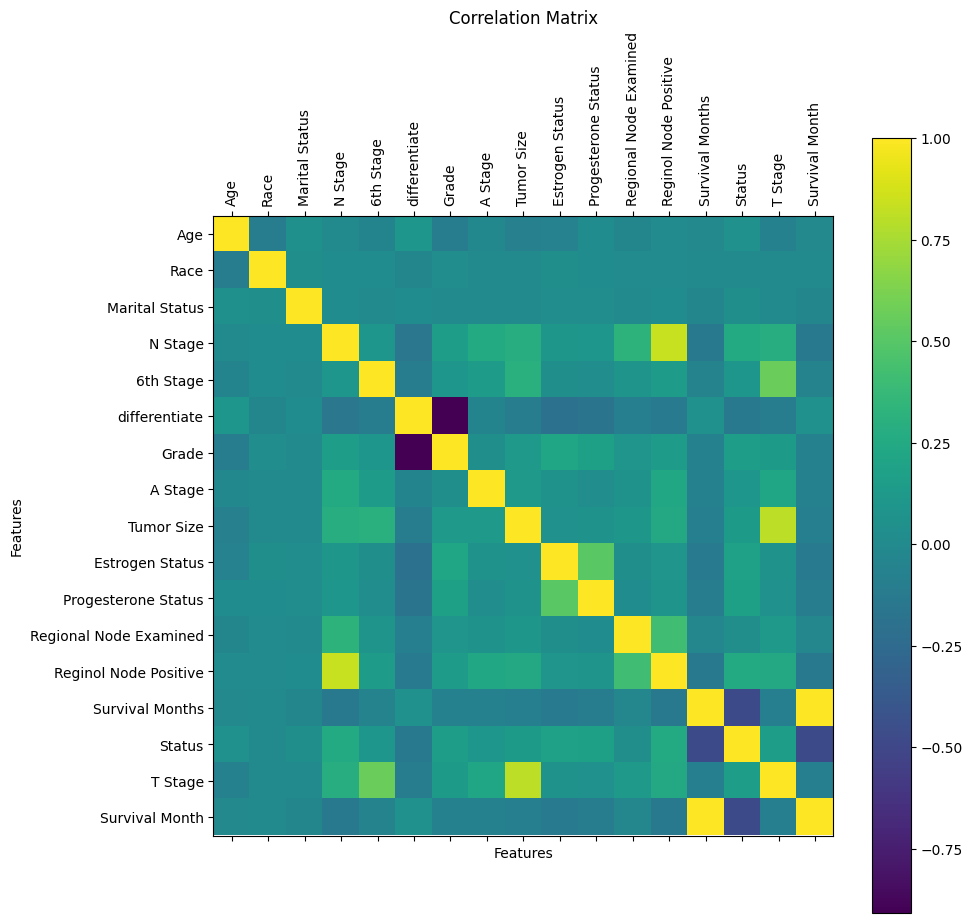

In [129]:
# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the correlation matrix heatmap
plt.matshow(df.corr())

# Set the tick labels
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns, rotation=90)

# Add a colorbar
plt.colorbar()

# Set the title and axis labels
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Race'}>,
        <Axes: title={'center': 'Marital Status'}>,
        <Axes: title={'center': 'N Stage'}>],
       [<Axes: title={'center': '6th Stage'}>,
        <Axes: title={'center': 'differentiate'}>,
        <Axes: title={'center': 'Grade'}>,
        <Axes: title={'center': 'A Stage'}>],
       [<Axes: title={'center': 'Tumor Size'}>,
        <Axes: title={'center': 'Estrogen Status'}>,
        <Axes: title={'center': 'Progesterone Status'}>,
        <Axes: title={'center': 'Regional Node Examined'}>],
       [<Axes: title={'center': 'Reginol Node Positive'}>,
        <Axes: title={'center': 'Survival Months'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'T Stage'}>],
       [<Axes: title={'center': 'Survival Month'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

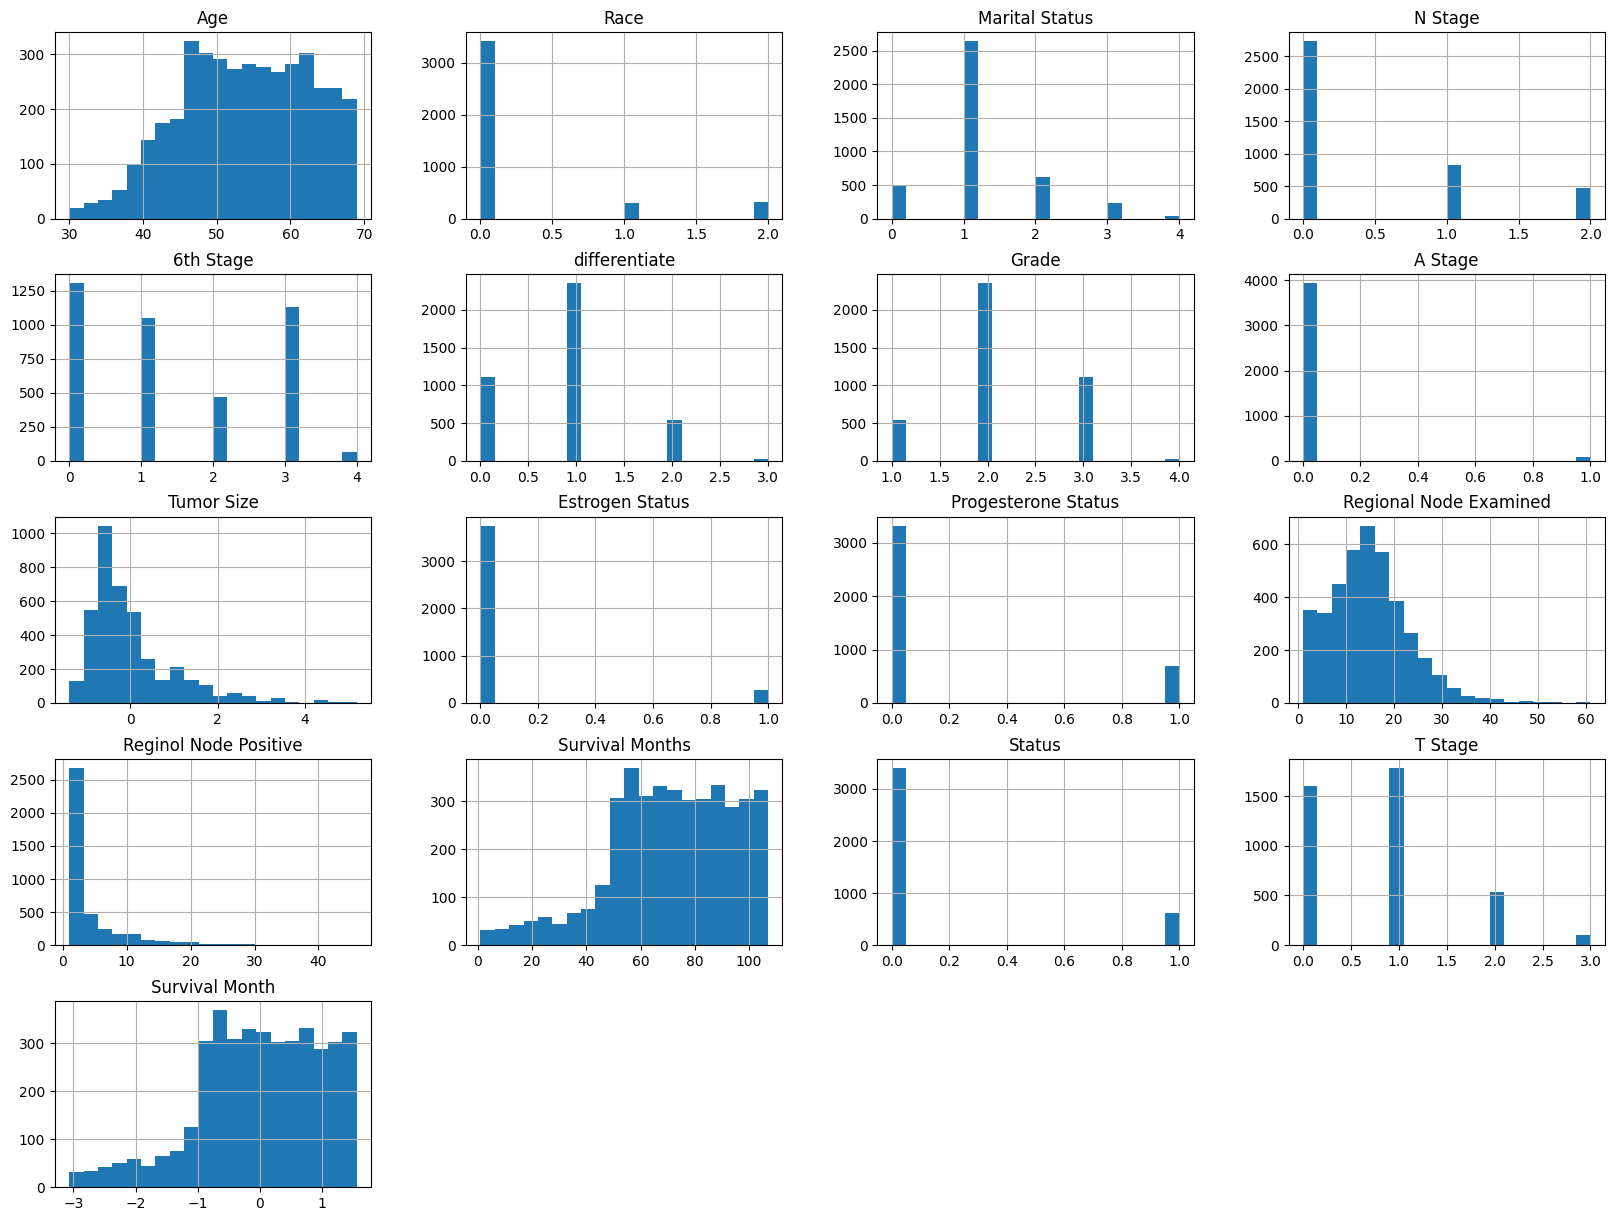

In [134]:
df.hist(bins= 20, figsize = (20, 15))

In [135]:
df.columns


Index(['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'T Stage',
       'Survival Month'],
      dtype='object')

In [137]:
from sklearn.metrics import roc_curve, auc

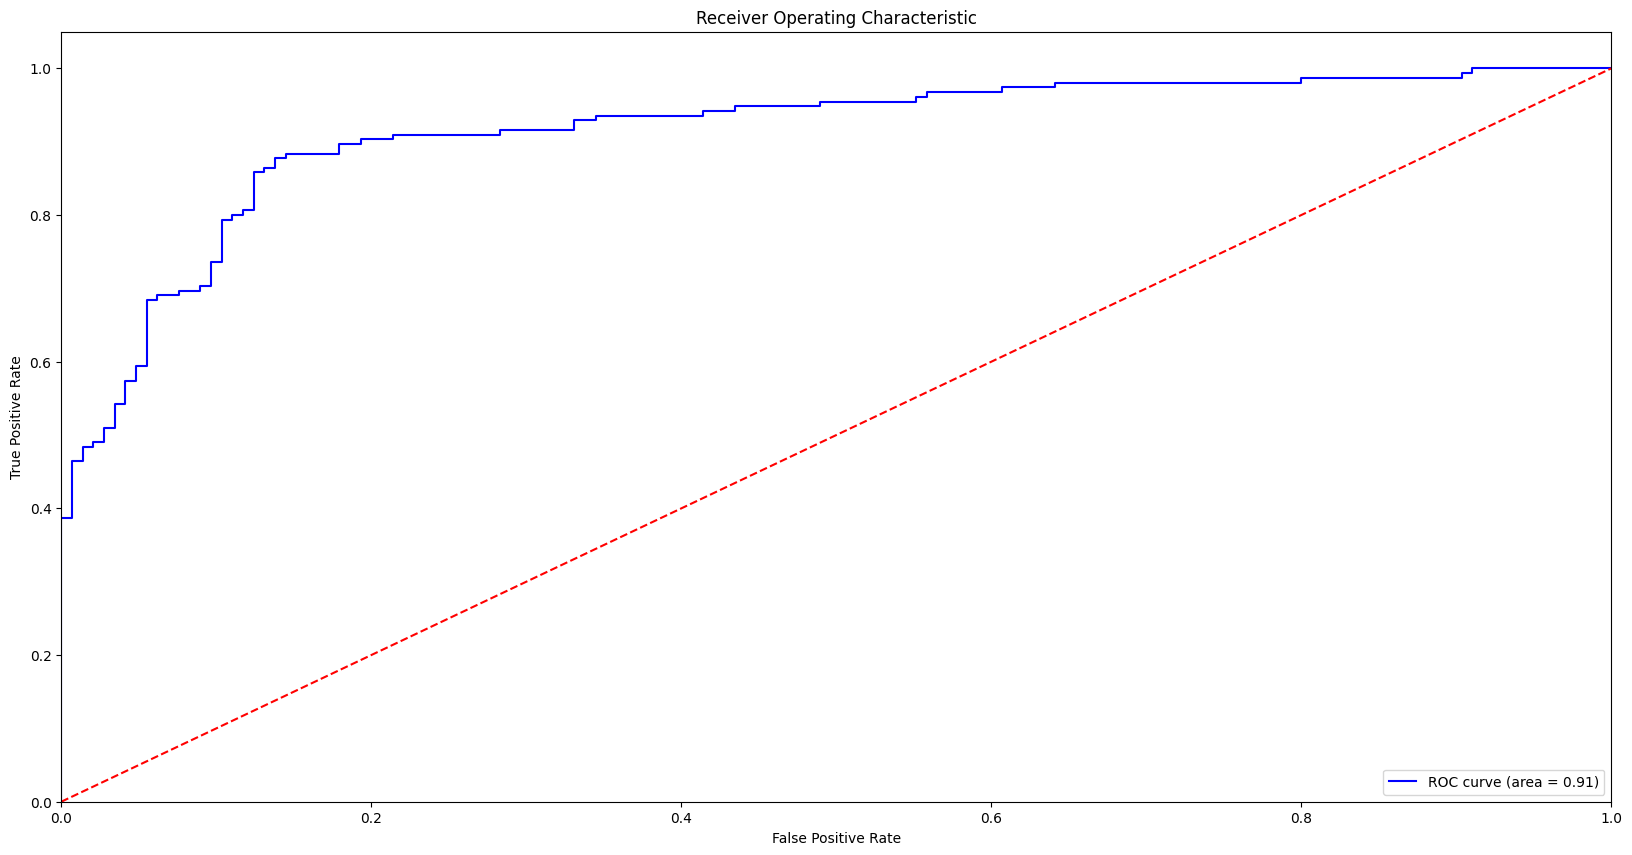

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()